In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Superbowl_Prob.csv to Superbowl_Prob.csv


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sup_bowl = pd.read_csv('Superbowl_Prob.csv')
sup_bowl['Team'] = np.where(sup_bowl.index<=19,'Bengals','Rams')
sup_bowl.head()

,Week,Home Game Flag,Temperature,OT,Favourite Flag,Win Flag,Team
0,1,1,84,1,0,1,Bengals
1,2,0,81,0,0,0,Bengals
2,3,0,68,0,0,0,Bengals
3,4,1,75,0,1,1,Bengals
4,5,1,81,1,0,1,Bengals


**Exploring Effect of External Factors on Match Results**

Text(0.5, 1.0, 'Temperature vs Wins - Bengals')

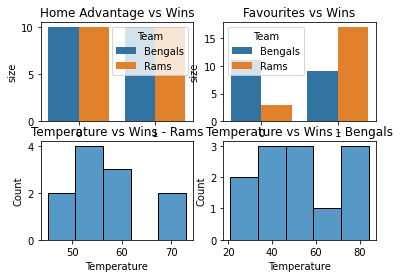

In [ ]:
#Win Stats for Rams & Bengals
figure, axis = plt.subplots(2,2)


hm_adv = sup_bowl.groupby(['Team','Home Game Flag'],as_index = False)['Win Flag'].size()
sns.barplot(x='Home Game Flag',y='size',hue='Team',data=hm_adv,ax = axis[0,0])

fav_flag = sup_bowl.groupby(['Team','Favourite Flag'],as_index = False)['Win Flag'].size()
sns.barplot(x='Favourite Flag',y='size',hue='Team',data=fav_flag,ax=axis[0,1])
#Create bins for temperature
sns.histplot(x="Temperature",data=sup_bowl[(sup_bowl['Win Flag']==1) & (sup_bowl['Team']=='Rams')],ax=axis[1,0])
sns.histplot(x="Temperature",data=sup_bowl[(sup_bowl['Win Flag']==1) & (sup_bowl['Team']=='Bengals')],ax=axis[1,1])

axis[0, 0].set_title("Home Advantage vs Wins")
axis[0, 1].set_title("Favourites vs Wins")
axis[1, 0].set_title("Temperature vs Wins - Rams")
axis[1, 1].set_title("Temperature vs Wins - Bengals")

**Logistic Regression to determine probability of Winning**

In [ ]:
sup_bowl = sup_bowl[['Temperature','Favourite Flag','Home Game Flag','Win Flag']]
#Running logistic regression to obtain probability scores
X = sup_bowl[['Temperature','Home Game Flag','Favourite Flag']]
y = sup_bowl[['Win Flag']]
logit_model = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_pred = pd.DataFrame(data=[[79,1,1]], columns = ['Temperature','Home Game Flag','Favourite Flag'])

pred_ot = logit_model.predict_proba(x_pred)
pred_ot

print(pred_ot)
#Probability of Rams Winning - 80%, based on Temperature, Home Advantage & being favoured by betters

[[0.20077039 0.79922961]]
